## Relationship between family dynamics (Marital Status and kidhome) against Types of Products Purchased

In [111]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches


In [112]:
#import cleaned data set 
customerdf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 
customerdf

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2212,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2214,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0


In [113]:
customerdf.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In merging all data sets, we now have 28 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using Marital Status, Kidhome, and Teenhome to predict the types of product bought.

The predictor variables of choice in this portion will be:

1. **Marital_Status:** Customer's marital status

2. **Kidhome:** Number of children in customer's household

3. **Teenhome:** Number of teenagers in customer's household

Our belief is that the marital status and family composition of customers may influence their purchasing behavior, particularly in relation to the types of products bought. For instance, we believe that: 
-  Married individuals may prioritize wine purchases for social or special occasions.
- Single individuals might spend less on wine compared to married counterparts.
- Families with children and teenagers allocate budget towards fruits, meat, and fish to meet family dietary needs and preferences.
- Besides that, Teenagers may influence higher spending on sweets or snacks within households.

Overall, marital status and family composition can influence spending patterns on various product categories, reflecting differences in household priorities, preferences, and lifestyle choices. Analyzing these relationships can provide valuable insights into consumer behavior and help businesses tailor their marketing strategies and product offerings to different demographic segments

## Data Preparation
##### We will start by analyzing the variables from the dataset (Marital Status, Kidhome, and Teenhome).


In [114]:
customerdf_joint = customerdf.loc[:, ['Marital_Status', 'Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Recency']]
customerdf_joint

,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency
0,Single,0,0,635,88,546,172,88,88,04-09-2012,58
1,Single,1,1,11,1,6,2,1,6,08-03-2014,38
2,Together,0,0,426,49,127,111,21,42,21-08-2013,26
3,Together,1,0,11,4,20,10,3,5,10-02-2014,26
4,Married,1,0,173,43,118,46,27,15,19-01-2014,94
...,...,...,...,...,...,...,...,...,...,...,...
2211,Married,0,1,709,43,182,42,118,247,13-06-2013,46
2212,Together,2,1,406,0,30,0,0,8,10-06-2014,56
2213,Divorced,0,0,908,48,217,32,12,24,25-01-2014,91
2214,Together,0,1,428,30,214,80,30,61,24-01-2014,8


## Factoring the average purchases per month 

**This improves the fairness of data with respect to the date customer joined as a member**

In [115]:
customerdf_joint['Dt_Customer'] = pd.to_datetime(customerdf_joint['Dt_Customer'], format='%d-%m-%Y')
customerdf_joint['CurrentDate'] = datetime.datetime(2021, 1, 1)
customerdf_joint['numMonths'] = ((customerdf_joint['CurrentDate'] - customerdf_joint['Dt_Customer'])/np.timedelta64(1, 'M'))
customerdf_joint['Recency'] = customerdf_joint['Recency']/30 #assume 30days in a month

In [116]:
#average purchases over the months
for var in customerdf_joint.columns[3:9]:
    customerdf_joint[var] = customerdf_joint[var]/ customerdf_joint["numMonths"]

customerdf_joint.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

In [117]:
customerdf_joint

,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Single,0,0,6.473200,0.897073,5.565932,1.753371,0.897073,0.897073
1,Single,1,1,0.136893,0.012445,0.074669,0.024890,0.012445,0.074669
2,Together,0,0,4.909294,0.564684,1.463569,1.279182,0.242007,0.484015
3,Together,1,0,0.135479,0.049265,0.246325,0.123162,0.036949,0.061581
4,Married,1,0,2.112249,0.525010,1.440725,0.561638,0.329657,0.183143
...,...,...,...,...,...,...,...,...,...
2211,Married,0,1,7.966292,0.483146,2.044944,0.471910,1.325843,2.775281
2212,Together,2,1,5.250730,0.000000,0.387985,0.000000,0.000000,0.103463
2213,Divorced,0,0,11.112515,0.587446,2.655744,0.391630,0.146861,0.293723
2214,Together,0,1,5.235991,0.367009,2.617995,0.978690,0.367009,0.746251


In [118]:
customerdf_predictor = pd.DataFrame(customerdf_joint[['Marital_Status', 'Kidhome', 'Teenhome']])
customerdf_predictor


,Marital_Status,Kidhome,Teenhome
0,Single,0,0
1,Single,1,1
2,Together,0,0
3,Together,1,0
4,Married,1,0
...,...,...,...
2211,Married,0,1
2212,Together,2,1
2213,Divorced,0,0
2214,Together,0,1


# Encoding non-numerical value 

 The 'Marital_Status' variable has been numerically encoded, with a corresponding legend provided for reference.

In [119]:
# convert the categorical variables to numerical values
customerdf_numeric_predictor = pd.DataFrame(customerdf_predictor)

# Encode Marital Status to Numerical Values
label_encoder = LabelEncoder()
customerdf_numeric_predictor['MaritalStatusEncoded'] = label_encoder.fit_transform(customerdf_numeric_predictor['Marital_Status'])

# Drop the original categorical Marital Status column
customerdf_numeric_predictor.drop('Marital_Status', axis=1, inplace=True)

# Display
customerdf_numeric_predictor

,Kidhome,Teenhome,MaritalStatusEncoded
0,0,0,4
1,1,1,4
2,0,0,5
3,1,0,5
4,1,0,3
...,...,...,...
2211,0,1,3
2212,2,1,5
2213,0,0,2
2214,0,1,5


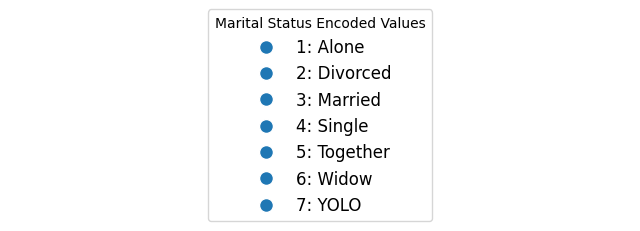

In [120]:
# Mapping between encoded values and education types
maritalstatus_mapping = {'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}

# Create proxy artists for legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label=f'{encoded_value}: {education_type}') for education_type, encoded_value in maritalstatus_mapping.items()]

# Create legend
plt.figure(figsize=(8, 1))
plt.axis('off')
plt.legend(handles=legend_handles, loc='center', fontsize='large', title='Marital Status Encoded Values')
plt.show()

In [121]:
customerdf_response = pd.DataFrame(customerdf_joint[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
customerdf_response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,6.473200,0.897073,5.565932,1.753371,0.897073,0.897073
1,0.136893,0.012445,0.074669,0.024890,0.012445,0.074669
2,4.909294,0.564684,1.463569,1.279182,0.242007,0.484015
3,0.135479,0.049265,0.246325,0.123162,0.036949,0.061581
4,2.112249,0.525010,1.440725,0.561638,0.329657,0.183143
...,...,...,...,...,...,...
2211,7.966292,0.483146,2.044944,0.471910,1.325843,2.775281
2212,5.250730,0.000000,0.387985,0.000000,0.000000,0.103463
2213,11.112515,0.587446,2.655744,0.391630,0.146861,0.293723
2214,5.235991,0.367009,2.617995,0.978690,0.367009,0.746251


In [122]:
# convert the categorical variables to numerical values
customerdf_numeric_joint = pd.DataFrame(customerdf_joint)

# Encode Marital Status to Numerical Values
label_encoder = LabelEncoder()
customerdf_numeric_joint['MaritalStatusEncoded'] = label_encoder.fit_transform(customerdf_numeric_joint['Marital_Status'])

# Drop the original categorical Marital Status column
customerdf_numeric_joint.drop('Marital_Status', axis=1, inplace=True)

# Display
customerdf_numeric_joint

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MaritalStatusEncoded
0,0,0,6.473200,0.897073,5.565932,1.753371,0.897073,0.897073,4
1,1,1,0.136893,0.012445,0.074669,0.024890,0.012445,0.074669,4
2,0,0,4.909294,0.564684,1.463569,1.279182,0.242007,0.484015,5
3,1,0,0.135479,0.049265,0.246325,0.123162,0.036949,0.061581,5
4,1,0,2.112249,0.525010,1.440725,0.561638,0.329657,0.183143,3
...,...,...,...,...,...,...,...,...,...
2211,0,1,7.966292,0.483146,2.044944,0.471910,1.325843,2.775281,3
2212,2,1,5.250730,0.000000,0.387985,0.000000,0.000000,0.103463,5
2213,0,0,11.112515,0.587446,2.655744,0.391630,0.146861,0.293723,2
2214,0,1,5.235991,0.367009,2.617995,0.978690,0.367009,0.746251,5


# Removing Outliers

In [123]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [124]:
customerdf_joint_cleaned = removeOut(customerdf_numeric_joint)
customerdf_response_cleaned = removeOut(customerdf_response)
customerdf_predictor_cleaned = removeOut(customerdf_numeric_predictor)

In [125]:
customerdf_joint_cleaned 

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MaritalStatusEncoded
1,1,1,0.136893,0.012445,0.074669,0.024890,0.012445,0.074669,4
2,0,0,4.909294,0.564684,1.463569,1.279182,0.242007,0.484015,5
3,1,0,0.135479,0.049265,0.246325,0.123162,0.036949,0.061581,5
4,1,0,2.112249,0.525010,1.440725,0.561638,0.329657,0.183143,3
5,0,1,6.035193,0.487458,1.137402,0.000000,0.487458,0.162486,5
...,...,...,...,...,...,...,...,...,...
2210,1,0,0.033929,0.033929,0.079168,0.067858,0.022619,0.101788,3
2212,2,1,5.250730,0.000000,0.387985,0.000000,0.000000,0.103463,5
2213,0,0,11.112515,0.587446,2.655744,0.391630,0.146861,0.293723,2
2214,0,1,5.235991,0.367009,2.617995,0.978690,0.367009,0.746251,5


## Multi-variate analysis 
We will first plot the box and whiskers plot, barchart, joint plot and heatmap for these factors.

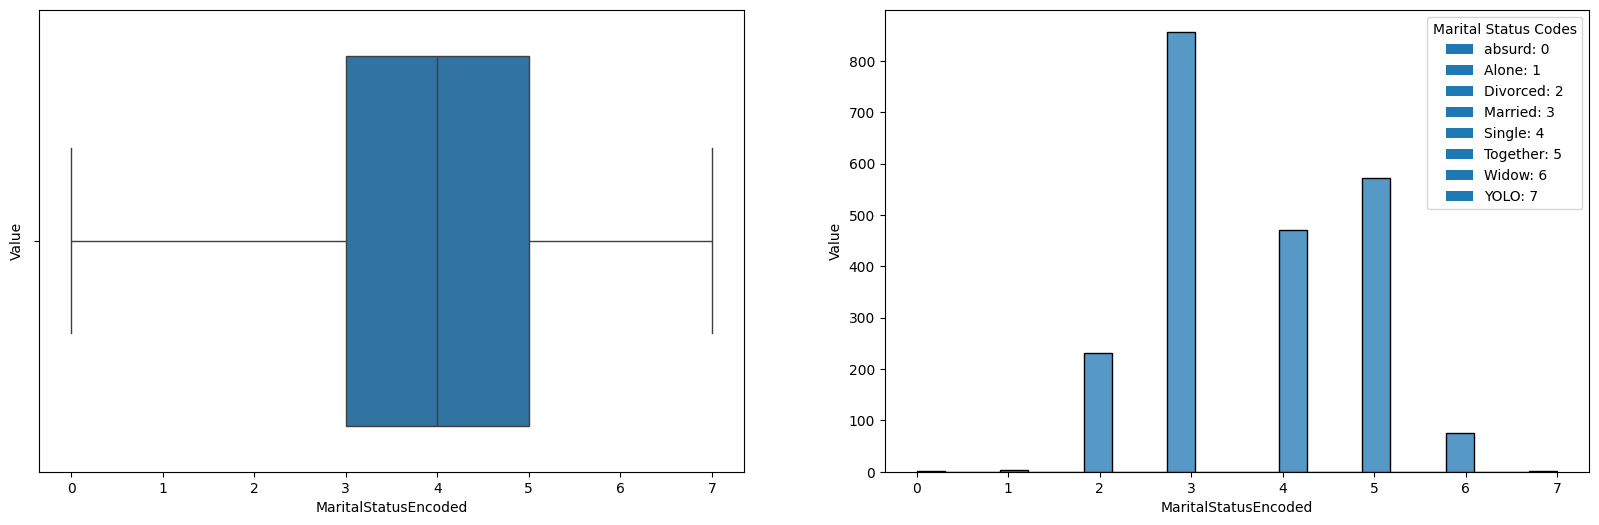

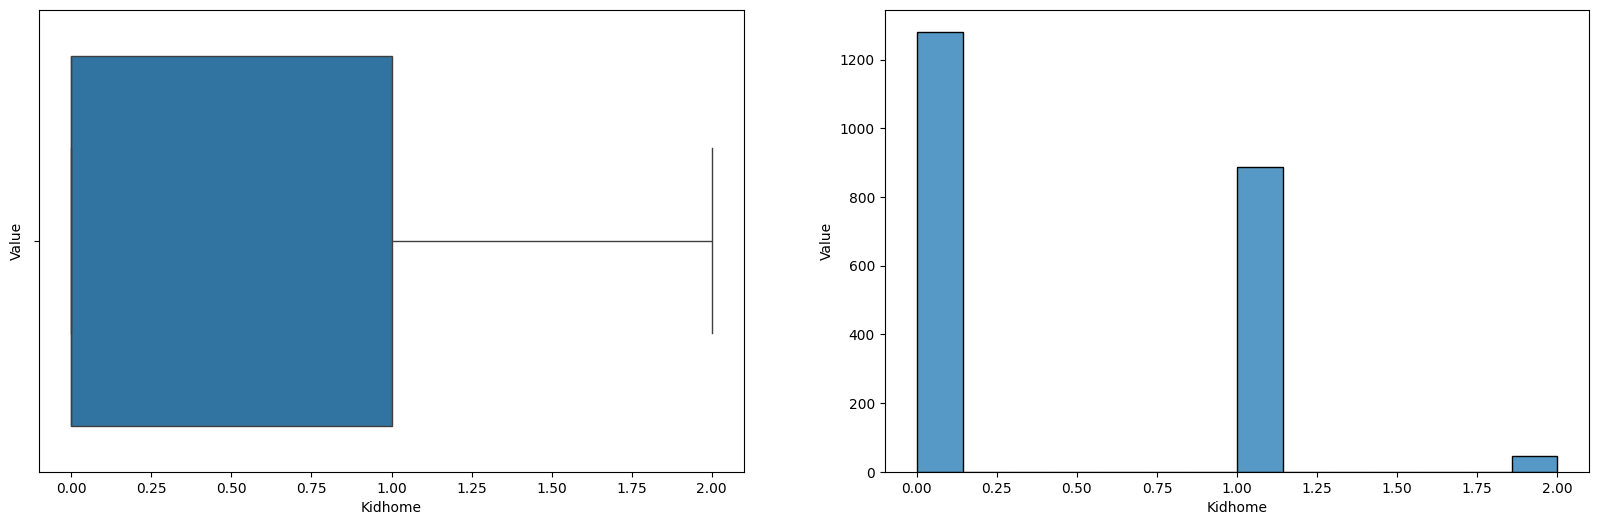

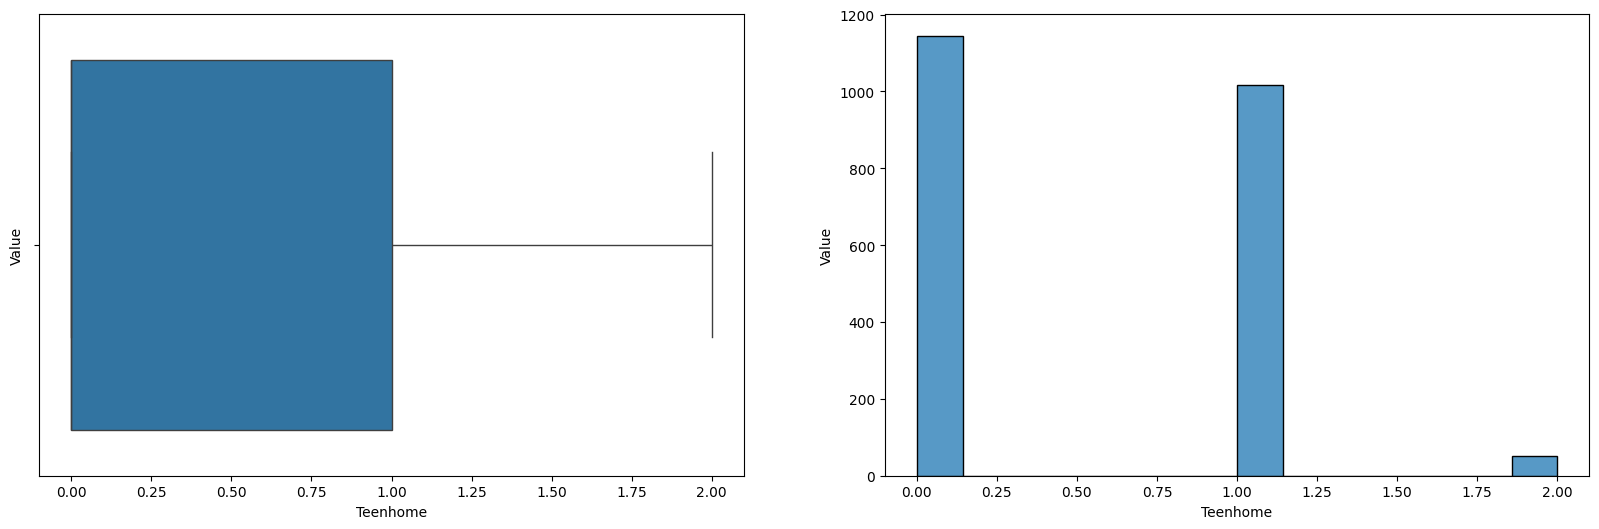

In [126]:
# Martial Status distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data=customerdf_numeric_predictor['MaritalStatusEncoded'], orient="h", ax=axes[0])
sb.histplot(data=customerdf_numeric_predictor['MaritalStatusEncoded'], ax=axes[1])

# Create a list of patch objects with the appropriate color and label for each category
maritalstatus_mapping = {'absurd' : 0,'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}

legend_handles = [mpatches.Patch(label=f'{label}: {encoding}') for label, encoding in maritalstatus_mapping.items()]
axes[1].legend(handles=legend_handles, title="Marital Status Codes")

for i in range(2):
    axes[i].set_xlabel('MaritalStatusEncoded')
    axes[i].set_ylabel('Value')

plt.show()

# Kidhome distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data=customerdf_predictor_cleaned['Kidhome'], orient="h", ax=axes[0])
sb.histplot(data=customerdf_predictor_cleaned['Kidhome'], ax=axes[1])
for i in range(2):
    axes[i].set_xlabel('Kidhome')
    axes[i].set_ylabel('Value')

# Teenhome distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data=customerdf_predictor_cleaned['Teenhome'], orient="h", ax=axes[0])
sb.histplot(data=customerdf_predictor_cleaned['Teenhome'], ax=axes[1])
for i in range(2):
    axes[i].set_xlabel('Teenhome')
    axes[i].set_ylabel('Value')

plt.show()


 For marital status, most customers are married, followed by a significant number of single individuals, with the categories 'Absurd' and 'YOLO' being the least represented. 
 The 'Kidhome' and 'Teenhome' distributions are positively skewed, suggesting that a larger number of households have no or one child/teen at home.

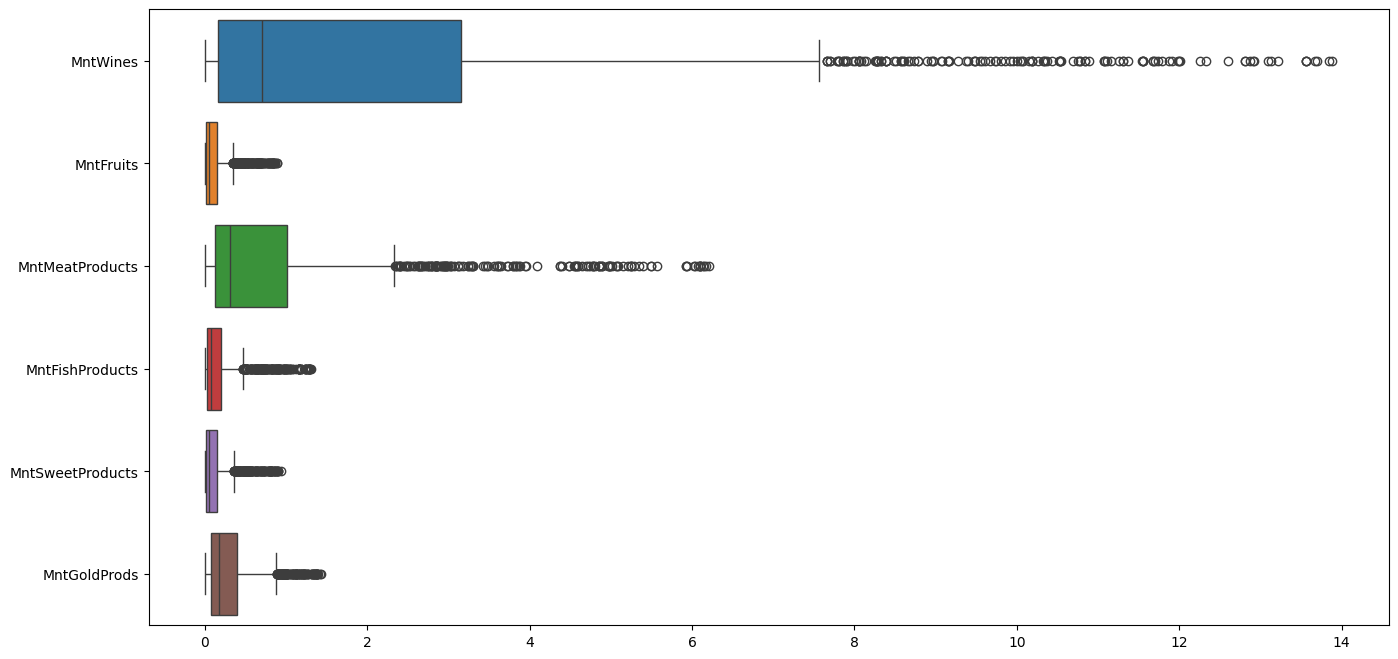

In [127]:
# Draw the Boxplots of response variables
plt.figure(figsize=(16, 8))
sb.boxplot(data=customerdf_response_cleaned, orient="h")
plt.show()


Wine appears to be the category with the highest median expenditure. In contrast, categories like fruits, sweets, and gold show lower median expenses. Overall, customer spending is most variable in the wine category.

## Jointplot
It will be more interesting to visualize them together in a jointplot as it tells us something about the correlation between the three variables

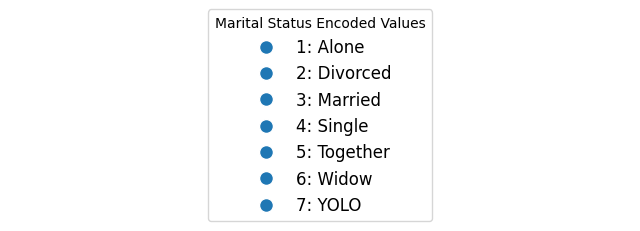

/var/folders/cz/9z0t9h5148s34k9v2y_x7f9h0000gn/T/ipykernel_34249/1936980042.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


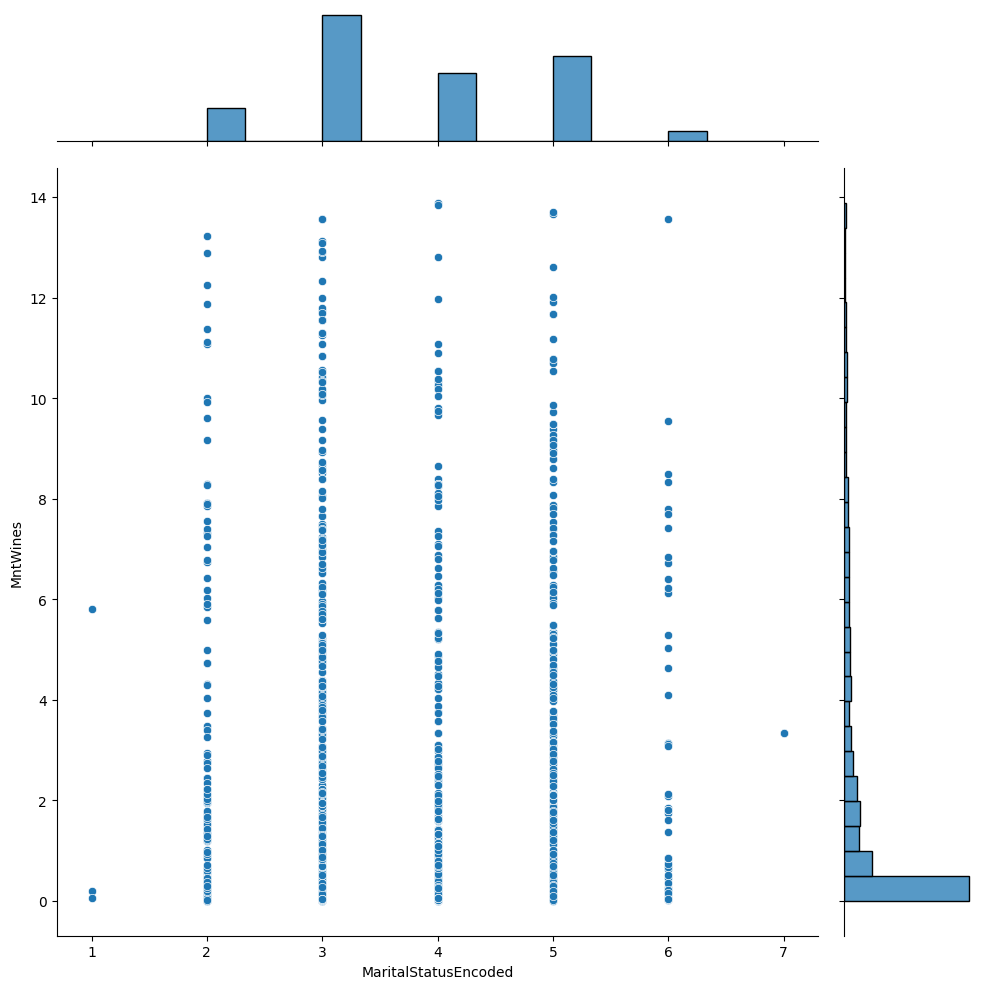

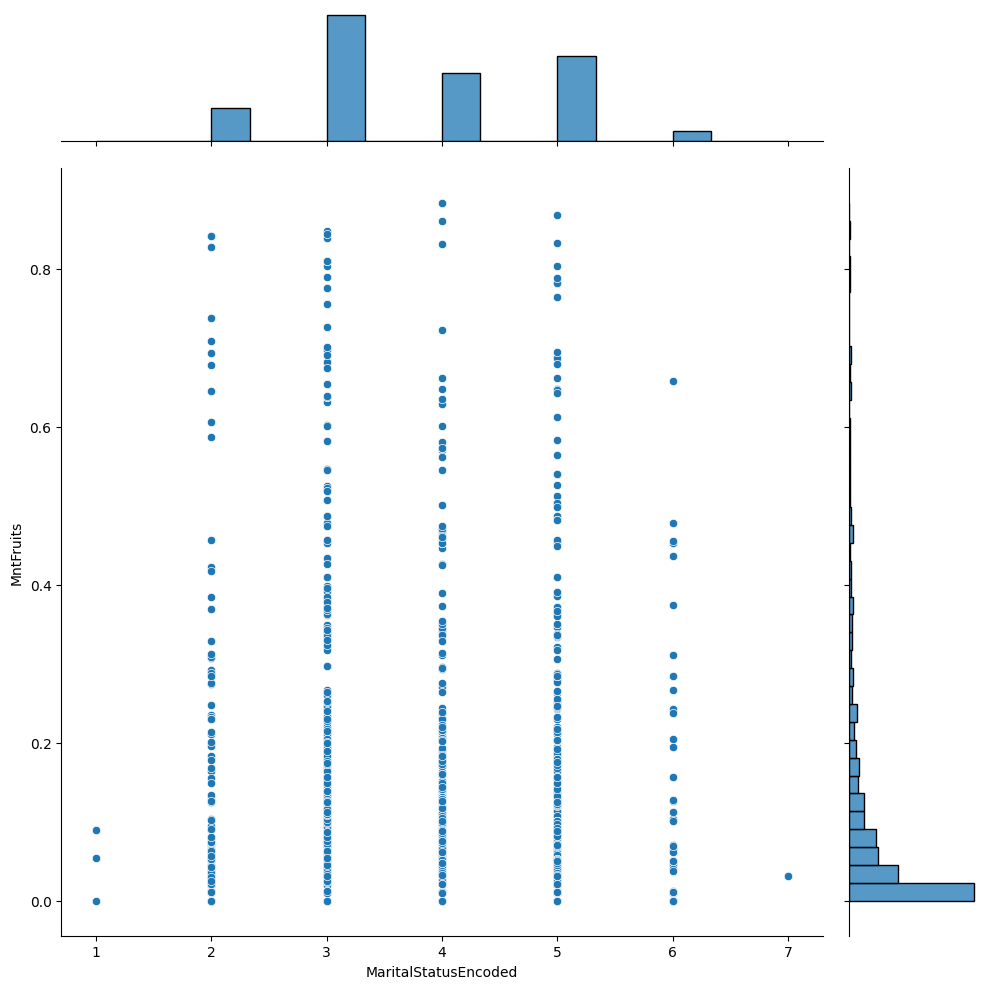

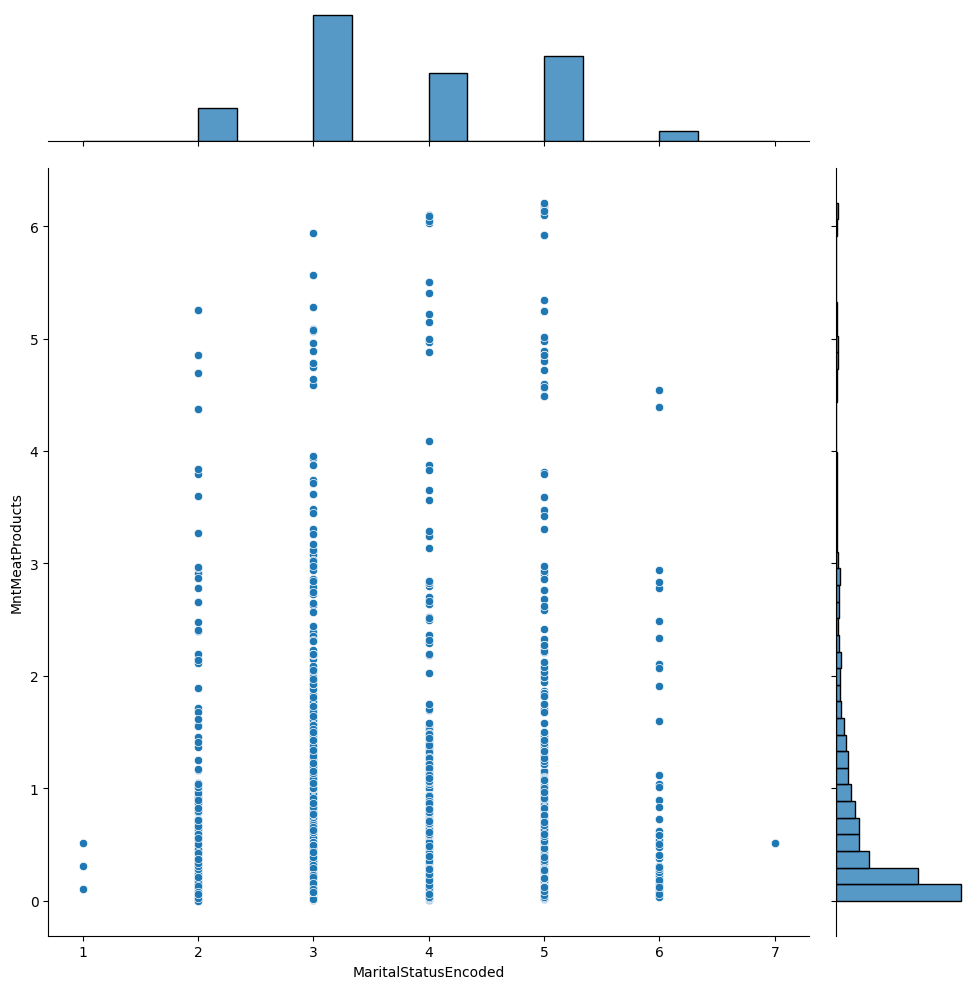

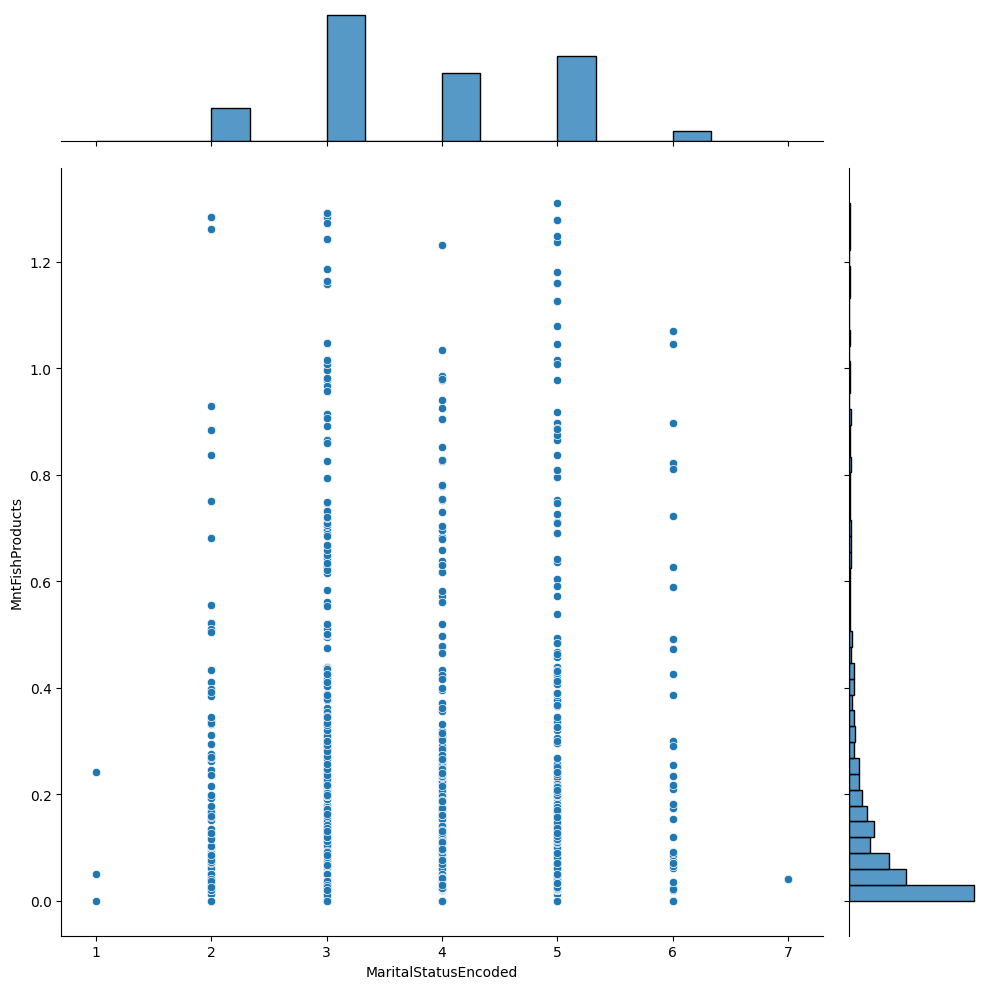

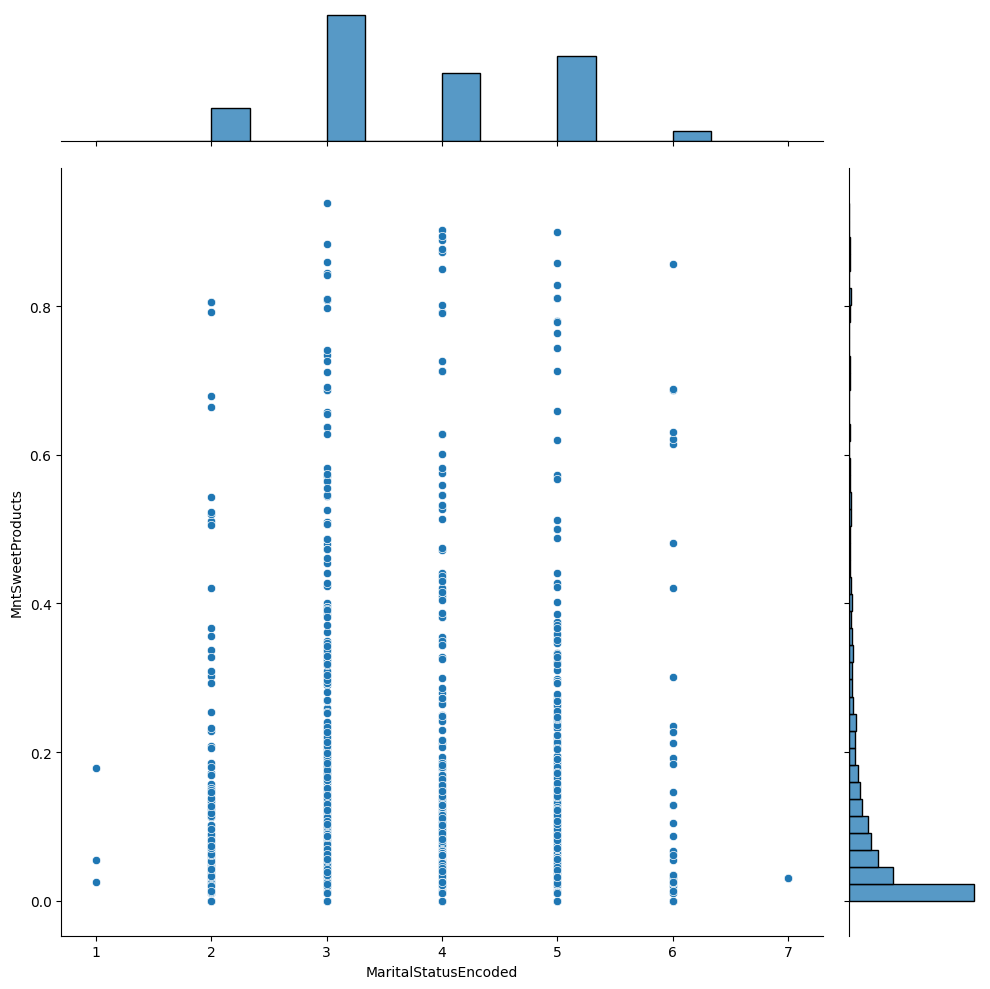

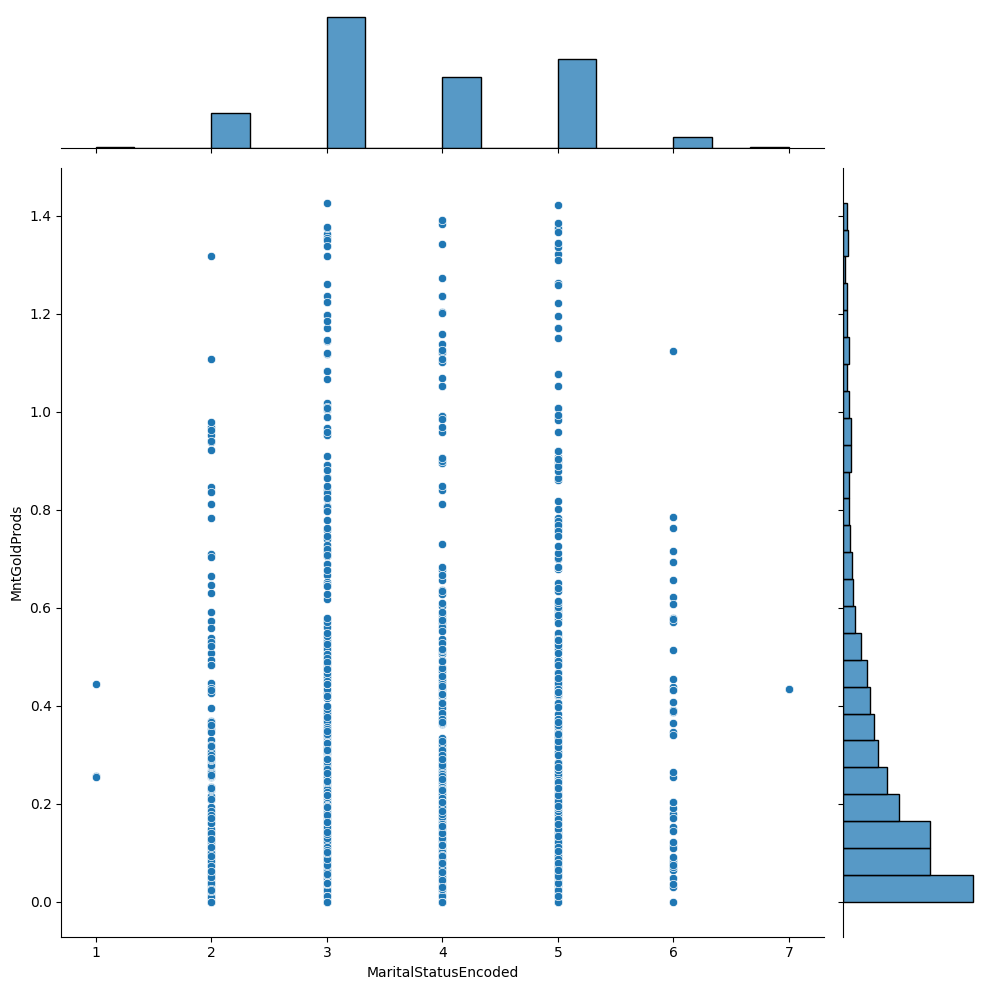

In [128]:
# Mapping between encoded values and education types
maritalstatus_mapping = {'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}

# Create proxy artists for legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label=f'{encoded_value}: {education_type}') for education_type, encoded_value in maritalstatus_mapping.items()]

# Create legend
plt.figure(figsize=(8, 1))
plt.axis('off')
plt.legend(handles=legend_handles, loc='center', fontsize='large', title='Marital Status Encoded Values')
plt.show()
    
for var in customerdf_joint_cleaned.columns[2:8]:
    sb.jointplot(data = customerdf_joint_cleaned, y = var, x = "MaritalStatusEncoded", height = 10)

plt.tight_layout()
plt.show()

/var/folders/cz/9z0t9h5148s34k9v2y_x7f9h0000gn/T/ipykernel_34249/3896559298.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


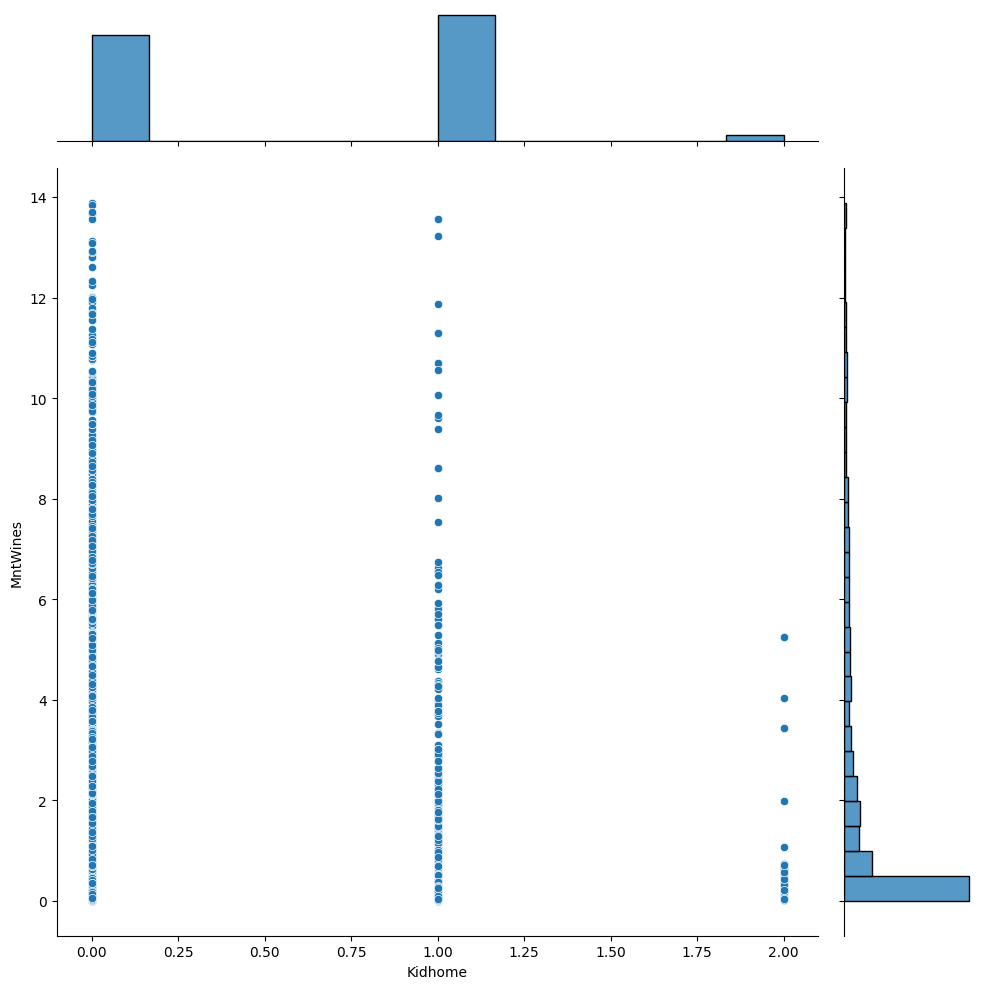

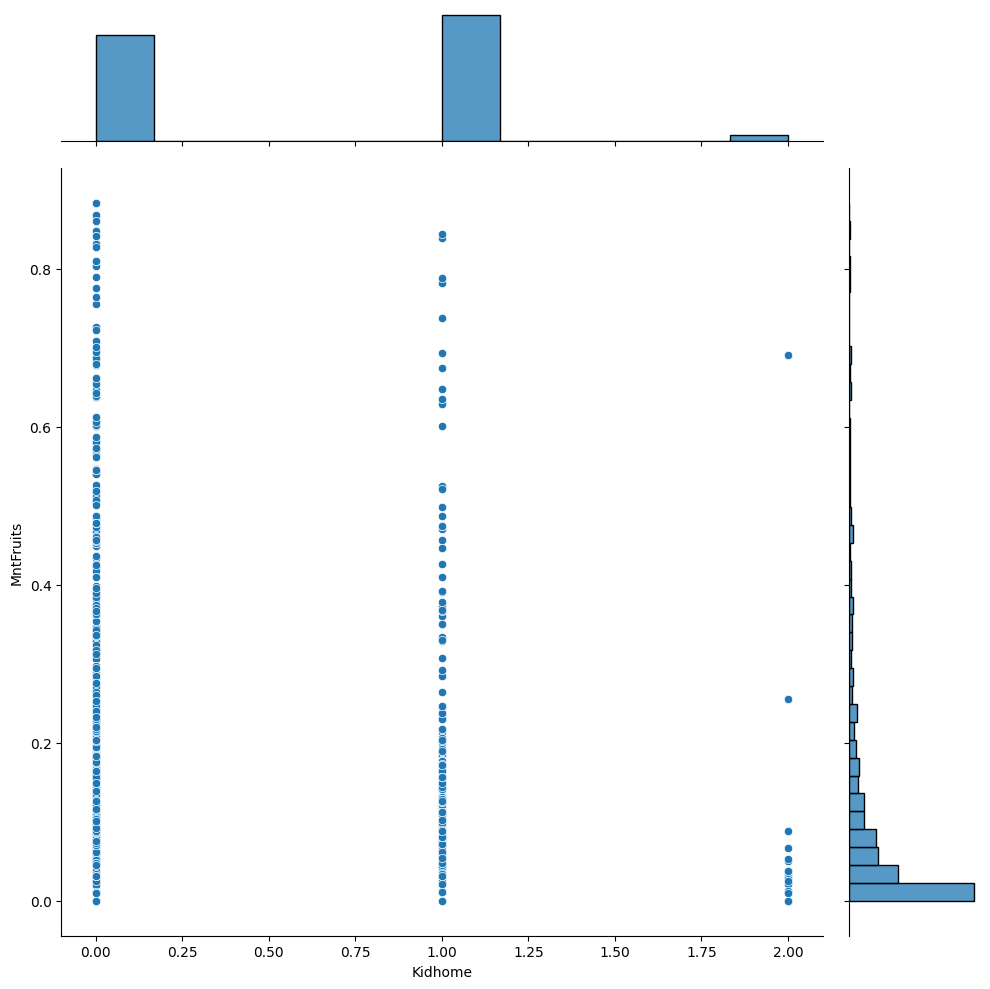

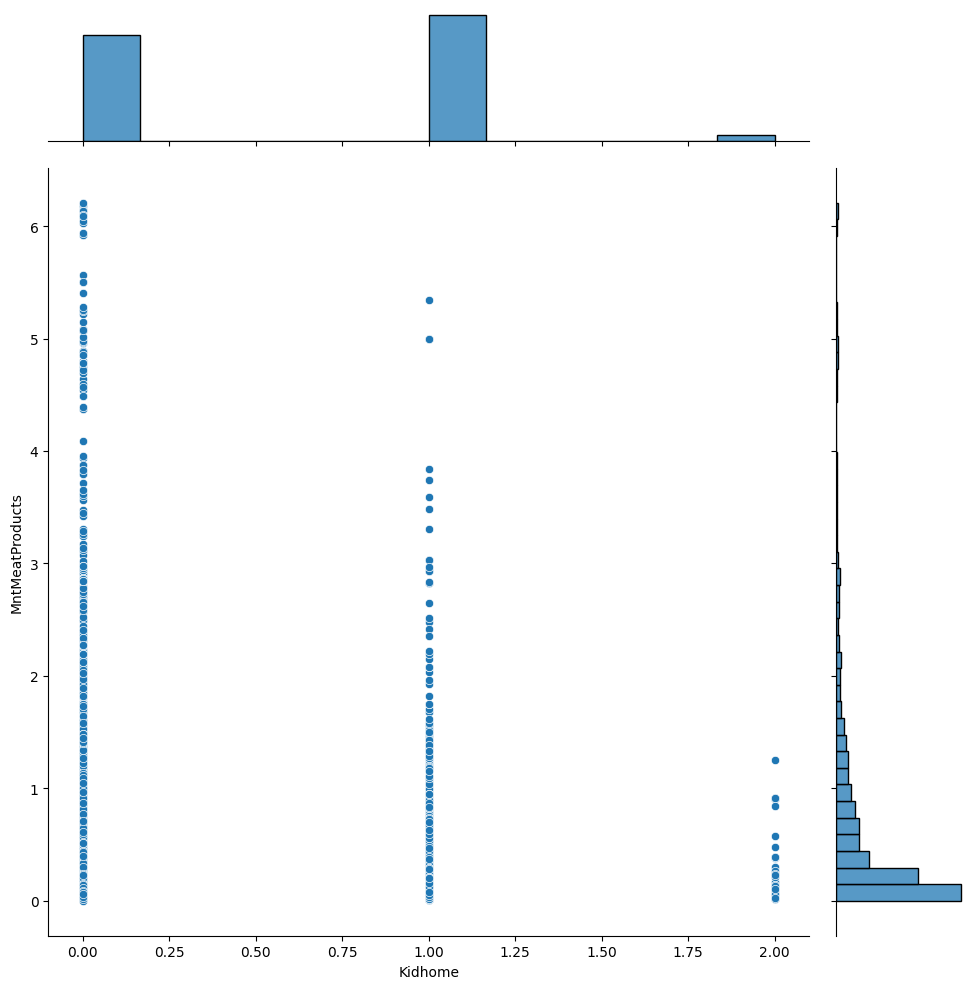

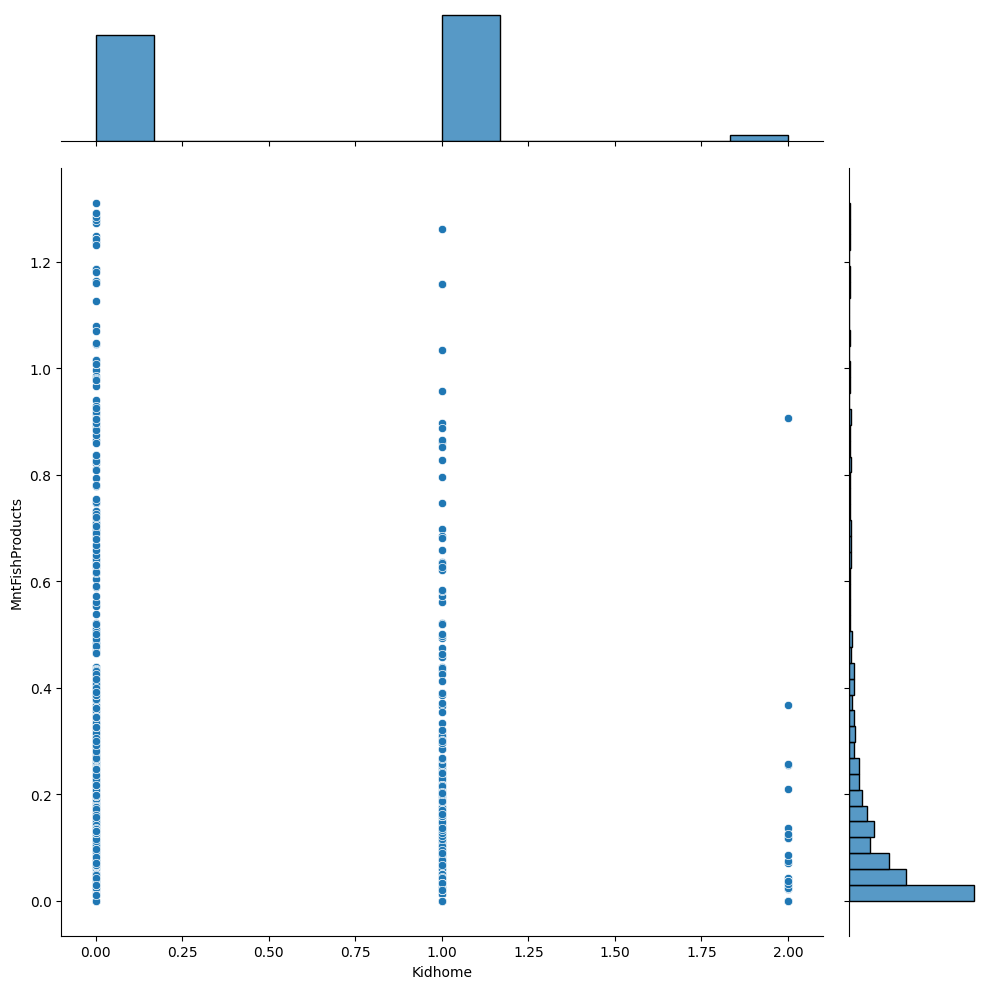

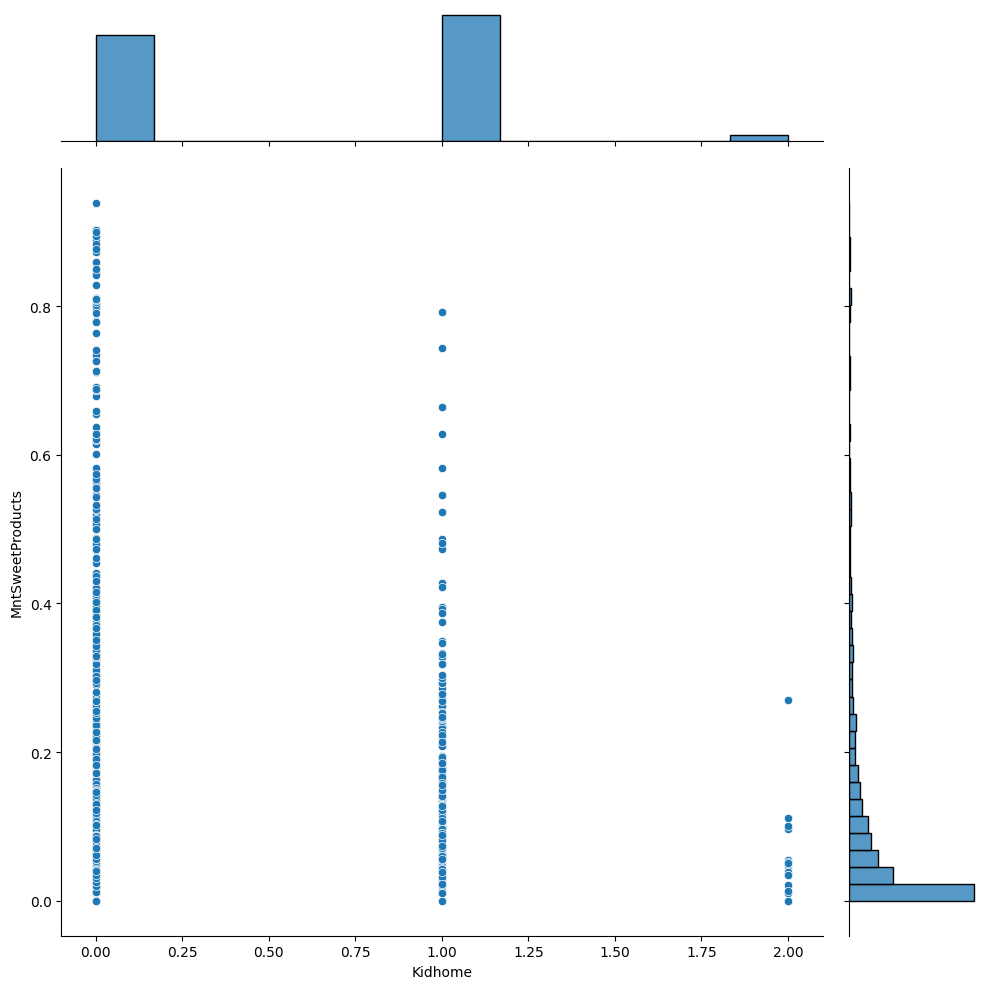

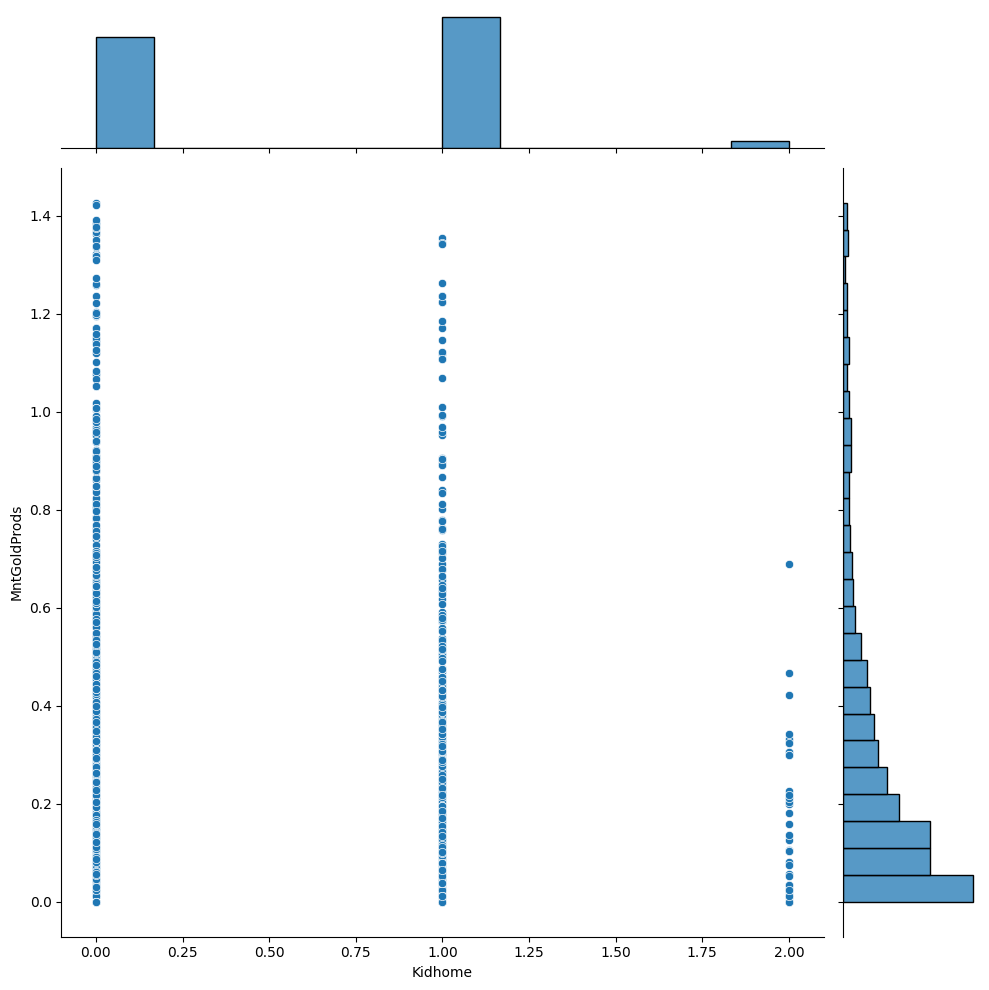

In [129]:
for var in customerdf_joint_cleaned.columns[2:8]:
    sb.jointplot(data = customerdf_joint_cleaned, y = var, x = "Kidhome", height = 10)

plt.tight_layout()
plt.show()

/var/folders/cz/9z0t9h5148s34k9v2y_x7f9h0000gn/T/ipykernel_34249/809313161.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


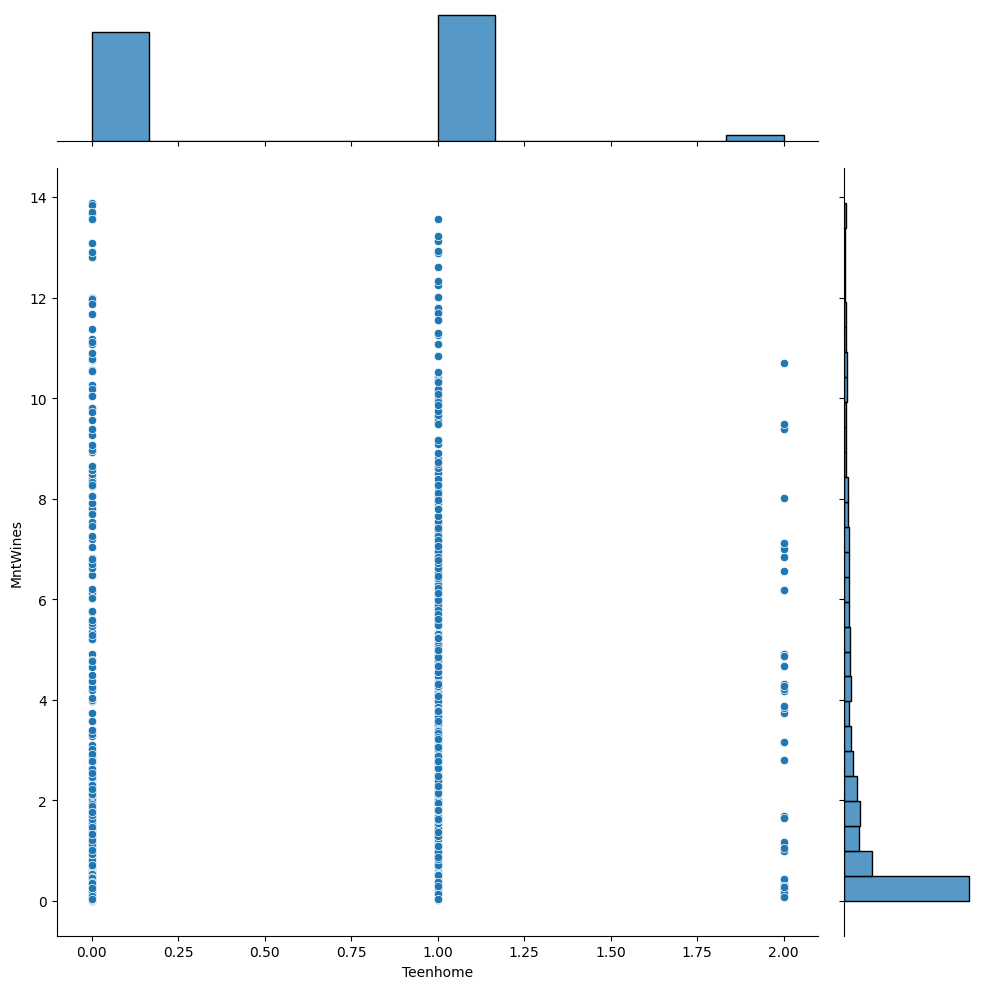

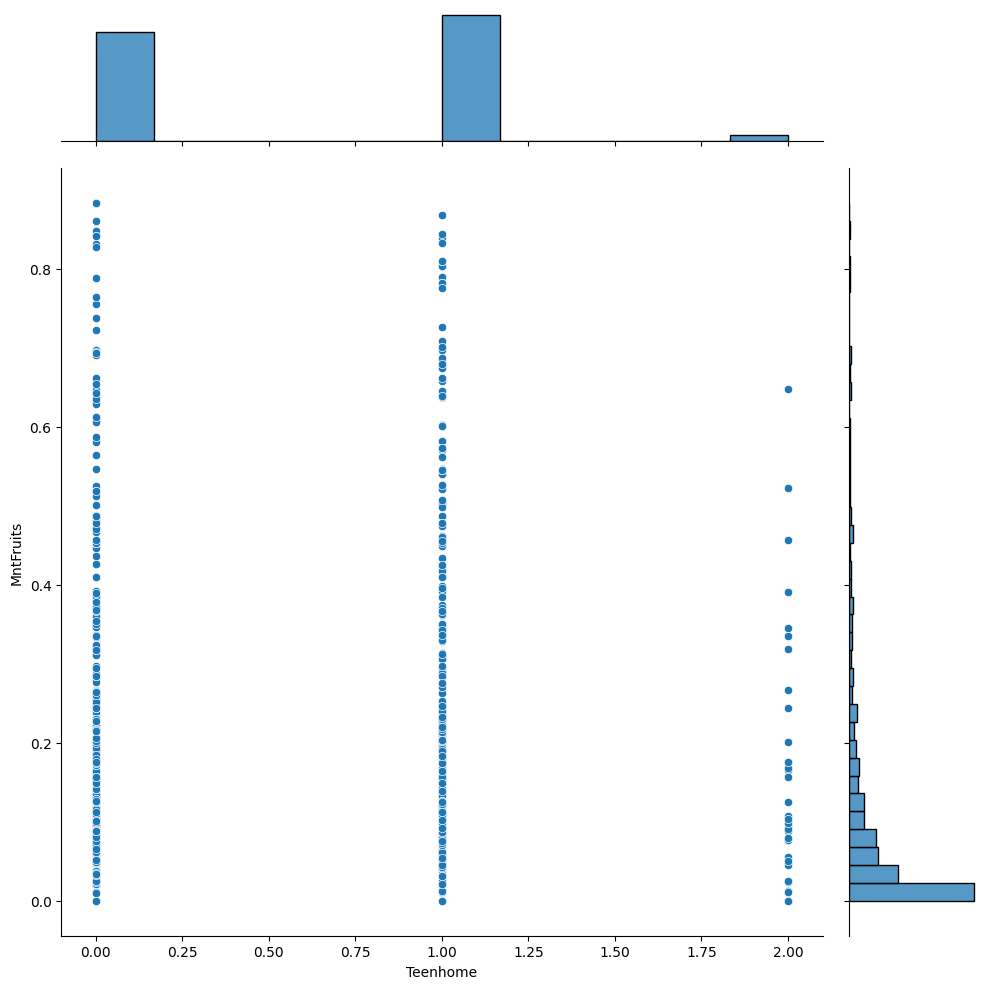

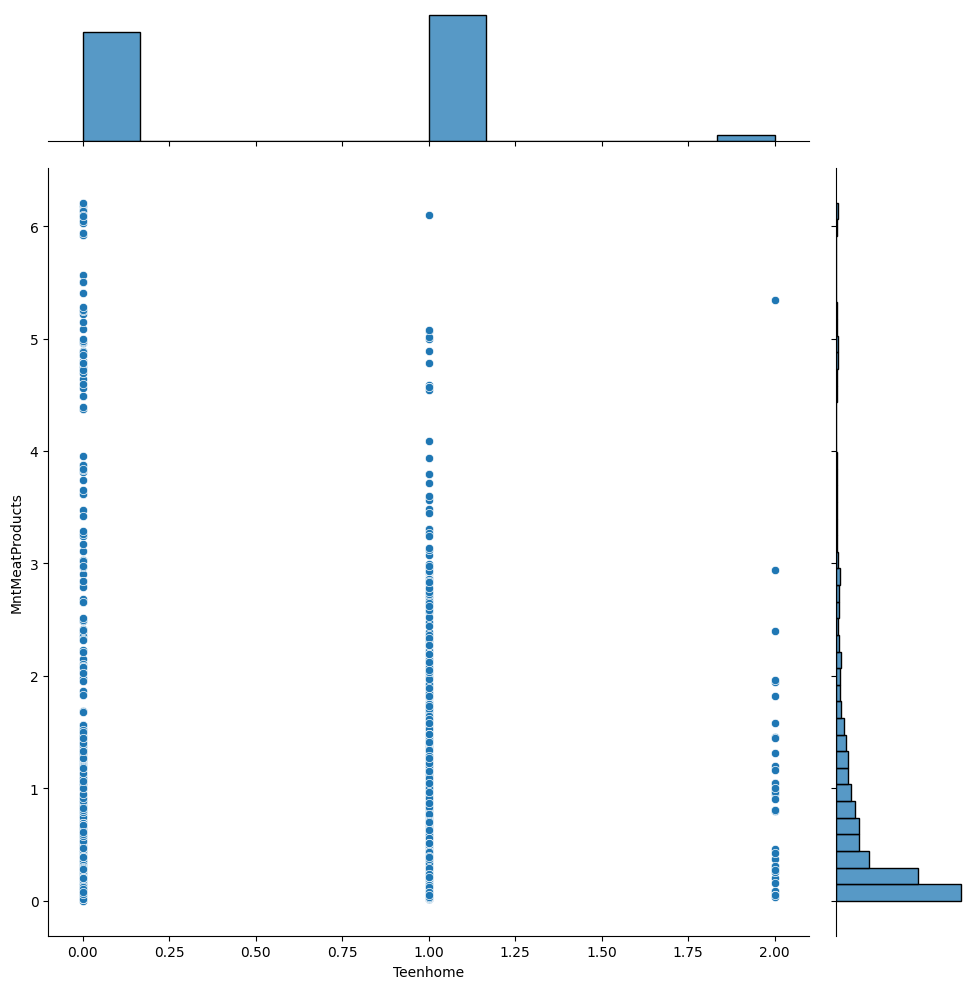

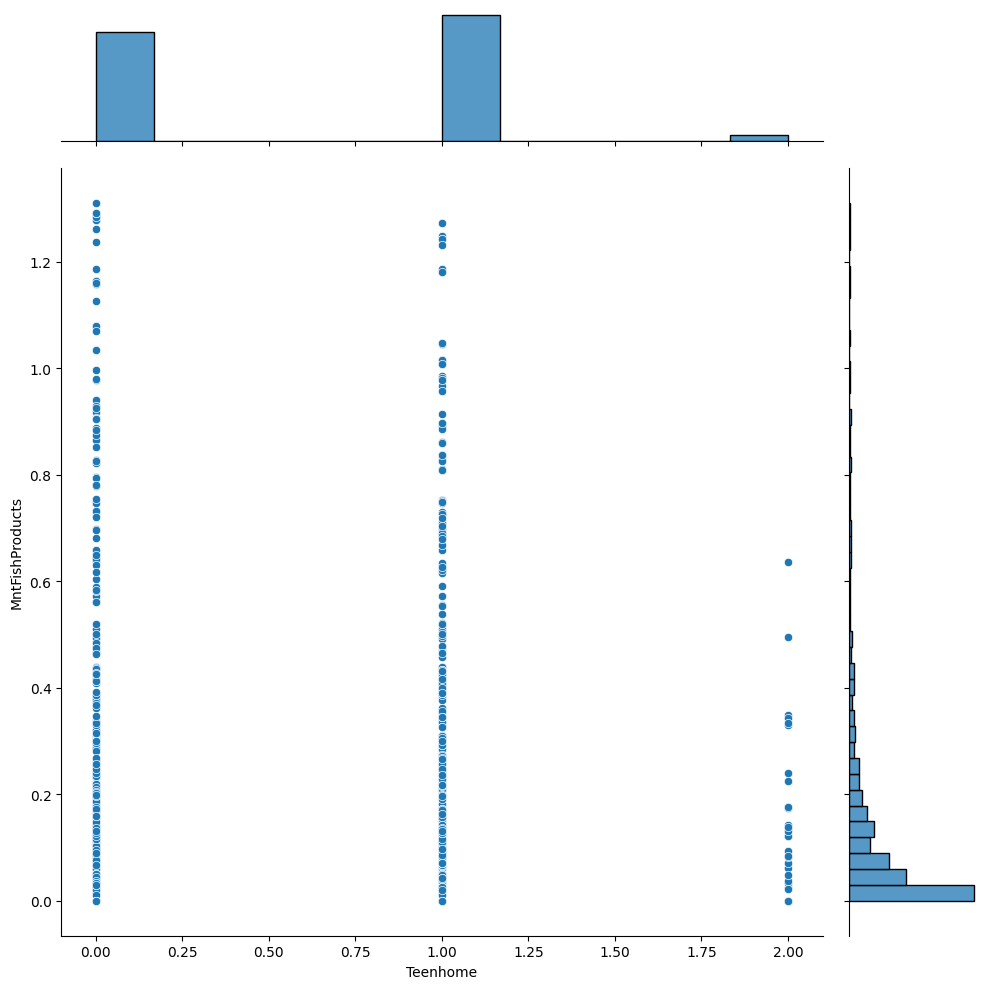

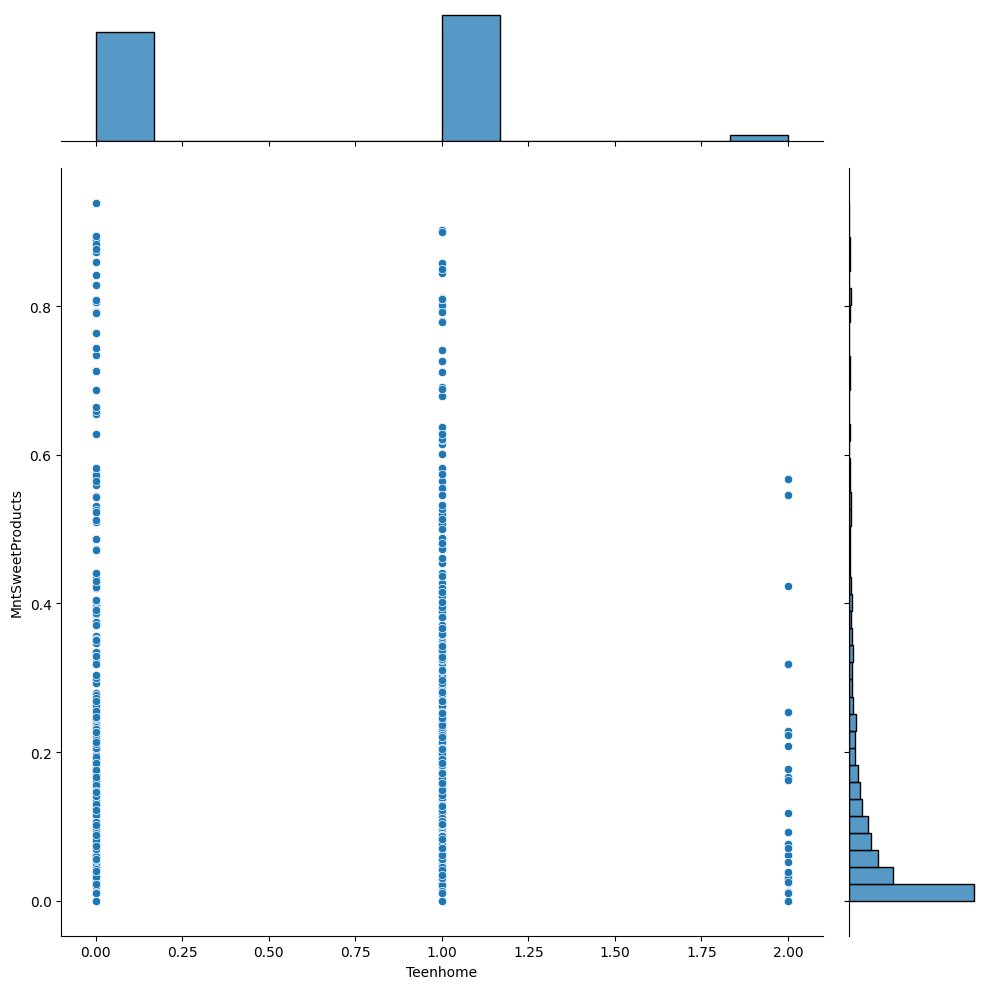

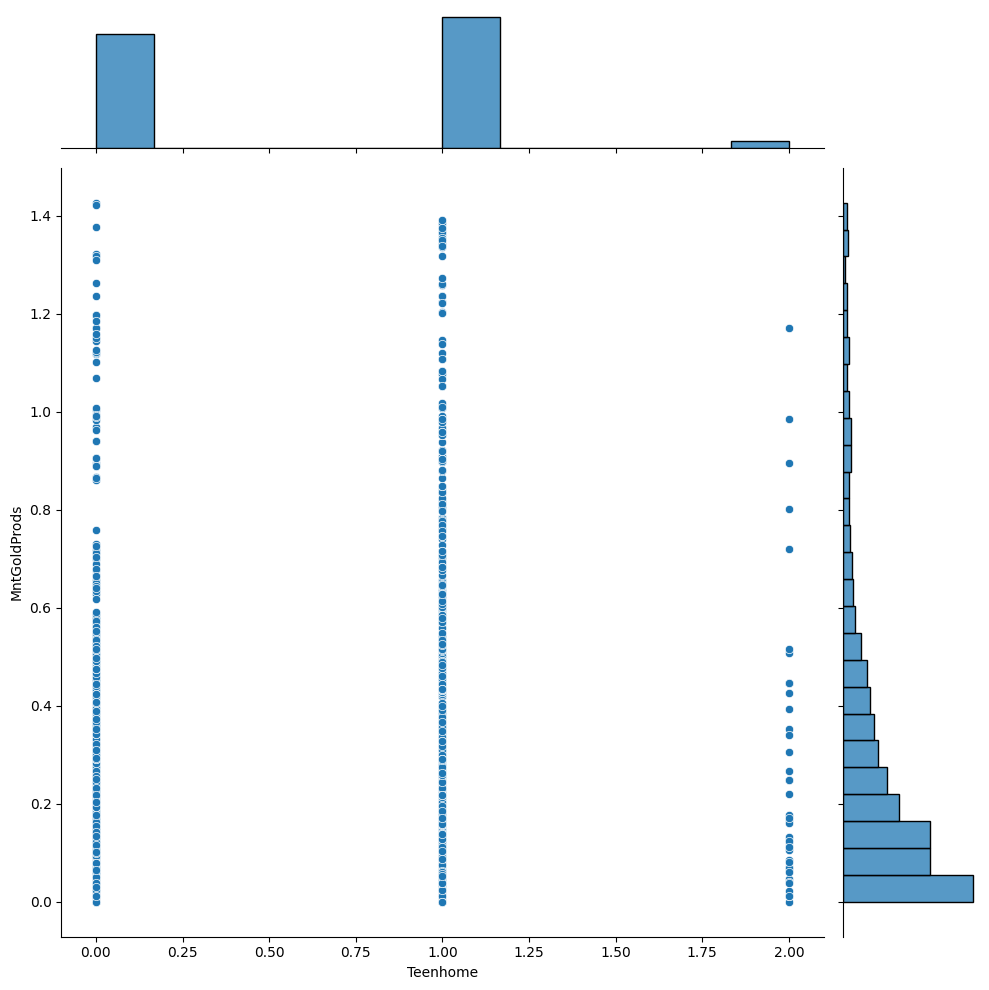

In [130]:
for var in customerdf_joint_cleaned.columns[2:8]:
    sb.jointplot(data = customerdf_joint_cleaned, y = var, x = "Teenhome", height = 10)

plt.tight_layout()
plt.show()

## Correlation matrix 

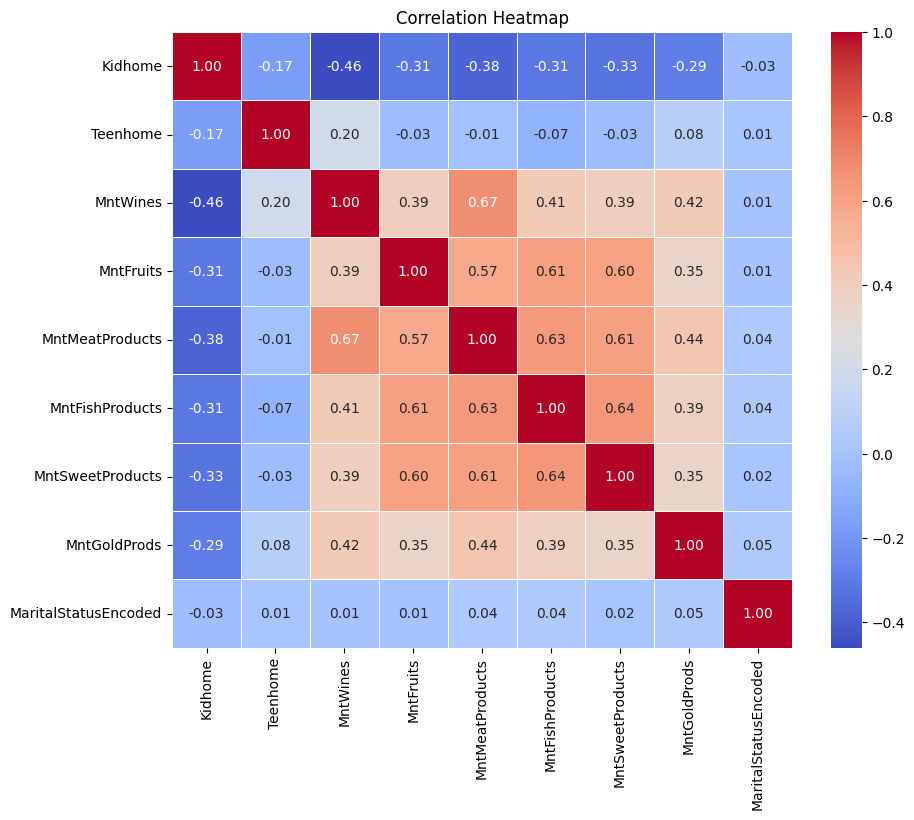

In [131]:
# Assuming customerdf_joint is your DataFrame
df = pd.DataFrame(customerdf_joint_cleaned)

# Encode categorical variables
df['MaritalStatusEncoded'] = df['MaritalStatusEncoded'].astype('category')
df['MaritalStatusEncoded'] = df['MaritalStatusEncoded'].cat.codes

# Compute the correlation matrix
corr_matrix = df.corr()

# create the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


A negative correlation exits between the number of kids at home and wine purchases, suggesting that wine spending decreases as the number of kids increases. Teen presence shows little impact on spending patterns. Marital status exhibits weak correlations across the dataset.

# K-means clustering

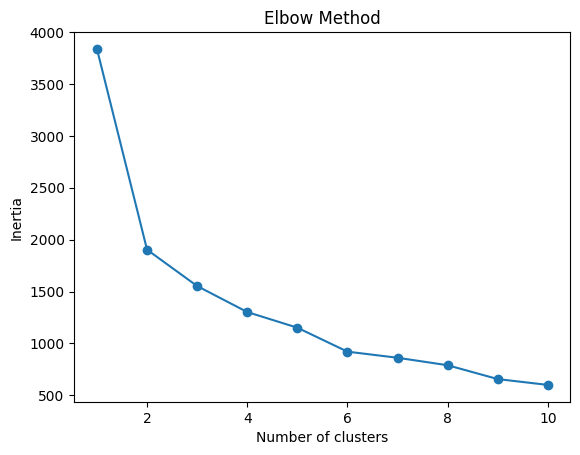

In [132]:
# Calculate inertia for different number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(customerdf_predictor_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


To determine the optimal number of clusters (k), we analyse the elbow method graph by locating the point at which the rate of decrease in intertia shifts from rapid to gradual. We conclude that k = 3.

Kidhome vs Products


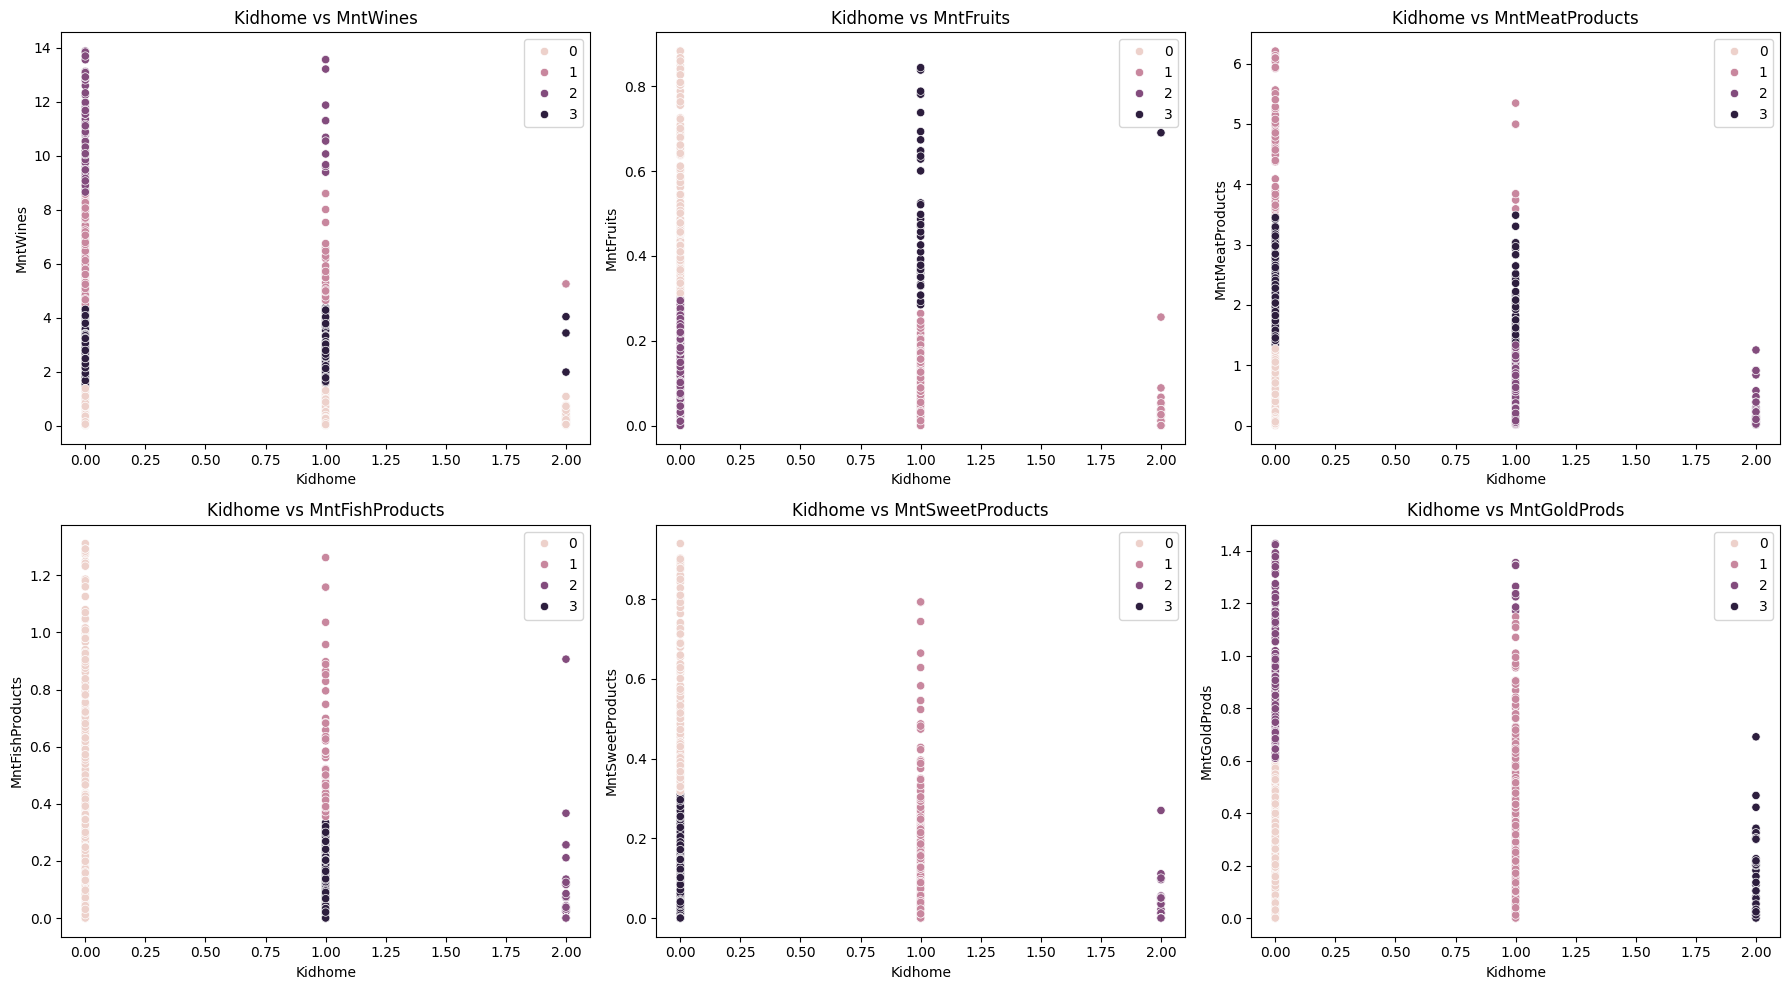

Teenhome vs Products


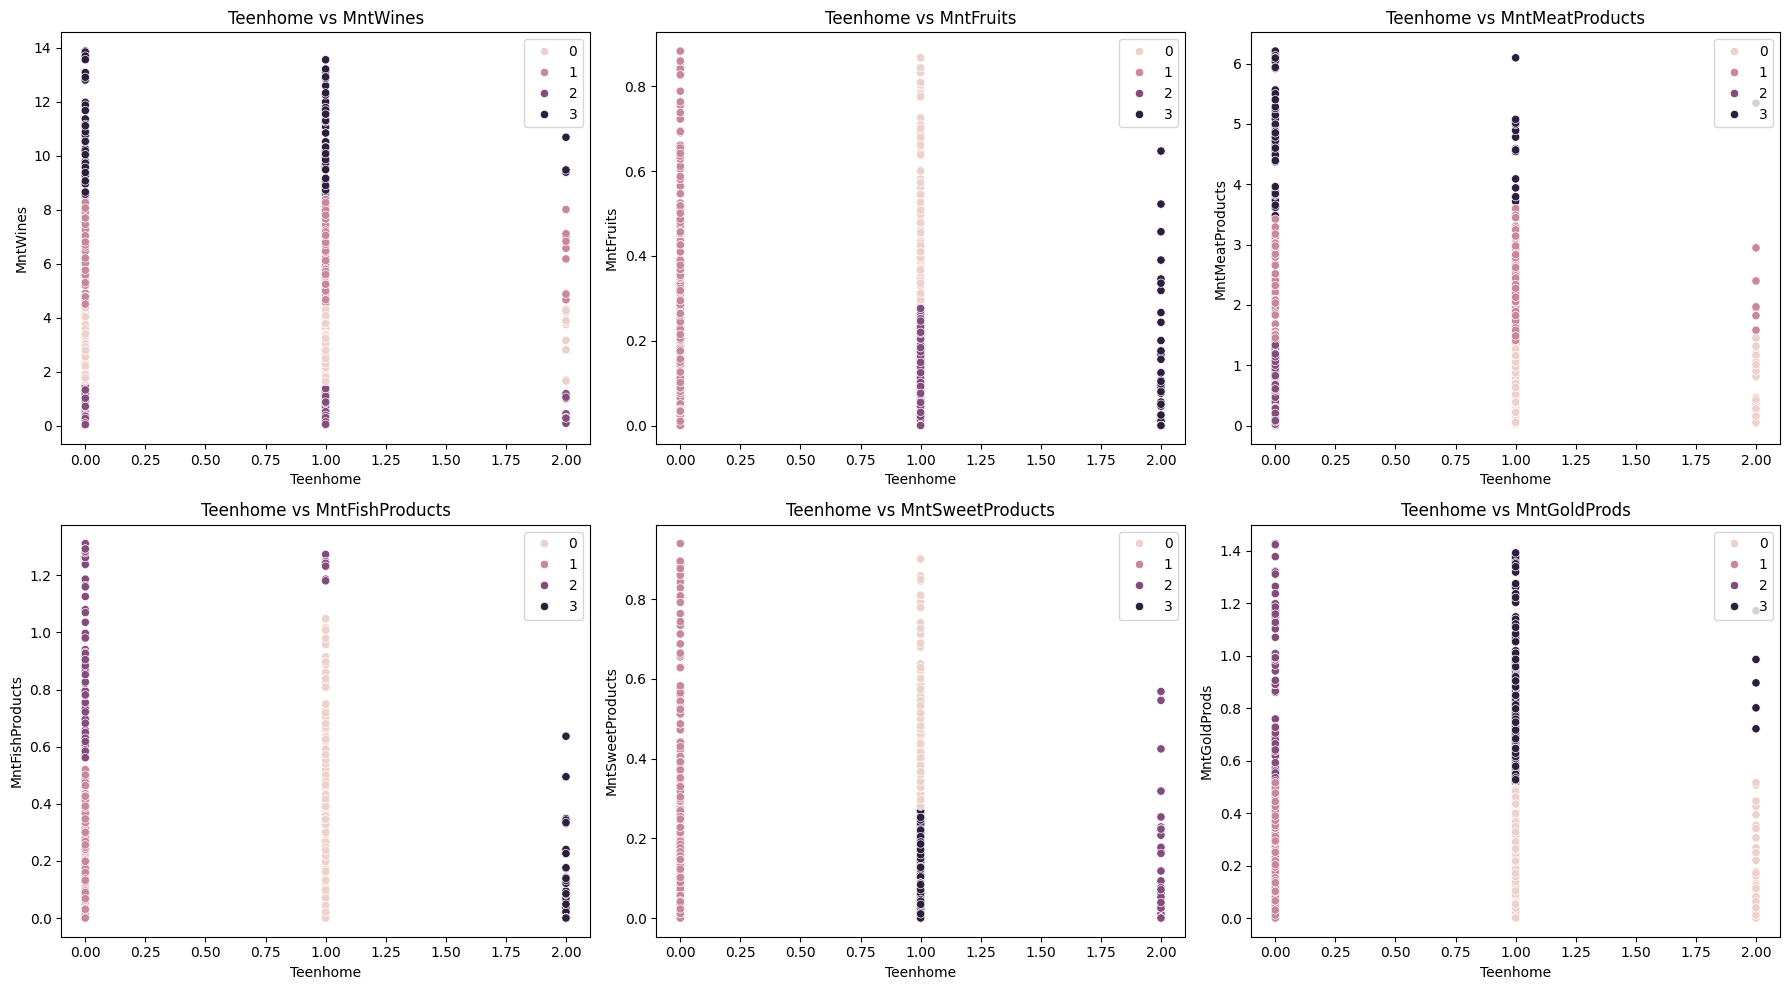

MaritalStatusEncoded vs Products


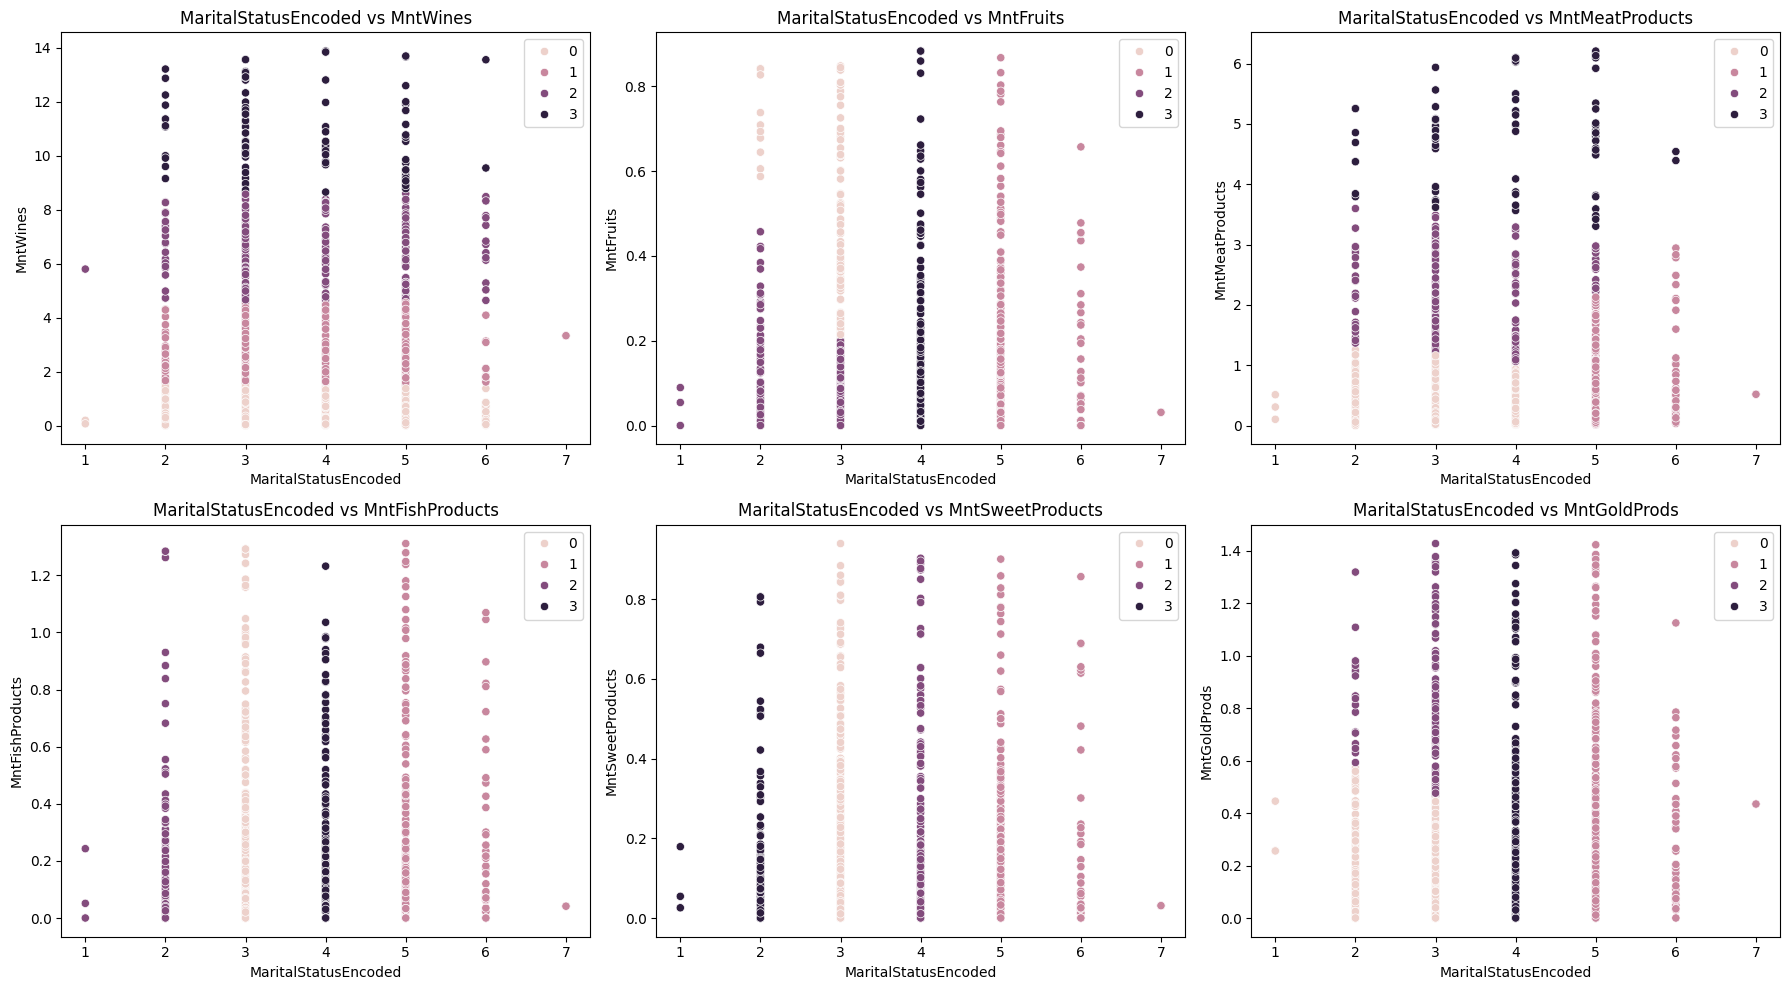

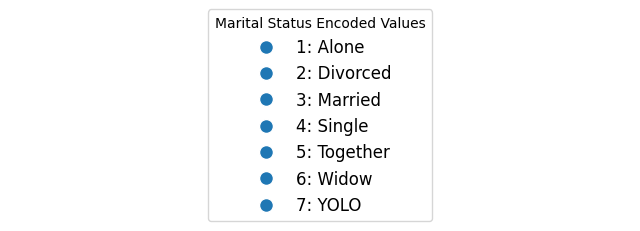

In [133]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Assuming 'customerdf_predictor_cleaned' and 'customerdf_response_cleaned' are lists of column names
for predictor_variable in customerdf_predictor_cleaned:
    print(f"{predictor_variable} vs Products")  # Print statement added
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Loop through each response variable
    for i, response_variable in enumerate(customerdf_response_cleaned):
        # Fit KMeans on the specific predictor and response variable
        kmeans.fit(customerdf_joint_cleaned[[predictor_variable, response_variable]])
        
        row = i // 3
        col = i % 3
        sb.scatterplot(data=customerdf_joint_cleaned, x=predictor_variable, y=response_variable, hue=kmeans.labels_, ax=axes[row, col])
        axes[row, col].set_title(f'{predictor_variable} vs {response_variable}')
        axes[row, col].set_xlabel(predictor_variable)
        axes[row, col].set_ylabel(response_variable)

    plt.tight_layout()
    plt.show()

# Create proxy artists for legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label=f'{encoded_value}: {education_type}') for education_type, encoded_value in maritalstatus_mapping.items()]

# Create legend
plt.figure(figsize=(8, 1))
plt.axis('off')
plt.legend(handles=legend_handles, loc='center', fontsize='large', title='Marital Status Encoded Values')
plt.show()

### Clusters

By looking at the overall clustering graphs , we can see that wine spending does not show clear cluster patterns for any predictor variables, making it challenging to derive meaningful insights for clustering evaluation.
It is evident that married customers with children (kid and teen) demonstrate an affinity to purchase fish and sweet, aligning with the hypothesis that such families with children and teen prioritize dietary needs. 
 
Meanwhile, a distinct cluster mainly comprosing widows and partnered individuals without children (kids, teen) shows preference for sweet, fruit, and gold products. Conversely, another cluster that predominantly includes single and divorced customers with kids and teens are more prone to purchase gold products items, which contrasts with the initial hypothesis that customers with family obligations regardless their marital status are more likely to purchase dietary products. 
 

Overall, the clustering data partially supports our hypothesis. The wine category does not exhibit distinct clusters based on predictor variables, suggesting wine purchasing may be influenced by factors not captured in our analysis.

